In [1]:
from fbprophet import Prophet

In [2]:
?Prophet

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)
Docstring:     
Prophet forecaster.

Parameters
----------
growth: String 'linear' or 'logistic' to specify a linear or logistic
    trend.
changepoints: List of dates at which to include potential changepoints. If
    not specified, potential changepoints are selected automatically.
n_changepoints: Number of potential changepoints to include. Not used
    if input `changepoints` is supplied. If `changepoints` is not supplied,
    then n_changepoints potential changepoints are selected uniformly from
    the first `changepoint_range`

In [3]:
from neuralprophet import NeuralProphet

In [4]:
?NeuralProphet

Init signature:
NeuralProphet(
    growth='linear',
    changepoints=None,
    n_changepoints=10,
    changepoints_range=0.9,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    seasonality_mode='additive',
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,
    ar_sparsity=None,
    learning_rate=None,
    epochs=None,
    batch_size=None,
    loss_func='Huber',
    optimizer='AdamW',
    train_speed=None,
    normalize='auto',
    impute_missing=True,
)
Docstring:     
NeuralProphet forecaster.

A simple yet powerful forecaster that models:
Trend, seasonality, events, holidays, auto-regression, lagged covariates, and future-known regressors.
Can be regualrized and configured to model nonlinear relationships.
Init docstring:
Args:
    ## Trend Config
    growth (str): ['off', 'linear'] to specify
        no trend or a linear trend.
        Note: '

In [6]:
import pandas as pd

from timemachines.skatertools.data.real import hospital_with_exog, hospital
from timemachines.skaters.nproph.nprophskaterfactory import fbnprophet_skater_factory
from timemachines.skatertools.utilities.nonemath import nearlysame
from timemachines.skaters.nproph.nprophiskaterfactory import (
    nprophet_iskater_factory,
    nprophet_fit_and_predict_simple, 
    nprophet_fit_and_predict_with_time,
    nprophet_fit_and_predict_with_time_and_advance_time,
    nprophet_fit_and_predict_with_advance_vars, 
    nprophet_fit_and_predict_with_exog_and_advance_vars,
    nprophet_fit_and_predict_with_exog_and_advance_vars_no_t
)
from timemachines.skaters.nproph.nprophparams import (
    NPROPHET_MODEL, NPROPHET_META)

from timemachines.skatertools.utilities.epochtime import (
    infer_freq_from_epoch, is_valid_freq, epoch_to_naive_datetime, EPOCH)


model_params = None
k = 1
n = 100
y, a = hospital_with_exog(k=k, n=n)
y = y[:-k]
t = [i * 15 * 50 for i in range(len(y) + k)]


kwargs_used = dict([(k, v) for k, v in NPROPHET_MODEL.items()])
if model_params:
    kwargs_used.update(model_params)
m = NeuralProphet(**kwargs_used)

if t is None:
    if freq is None or not freq:
        freq = NPROPHET_META['freq']  # Just assume away ...
    else:
        assert is_valid_freq(freq), 'Freq ' + str(freq) + ' is not a valid frequency'
    dt = pd.date_range(start=EPOCH, periods=len(y), freq=freq)  # UTC
else:
    freq = infer_freq_from_epoch(t)
    print('infering freq param as {}'.format(freq))
    dt = epoch_to_naive_datetime(t)

if len(dt) == len(y) + k:
    ta = dt
    dt = dt[:len(y)]
else:
    assert len(dt) == len(y), 'Time vector t should be len(y) or len(y)+k'
    ta = None

# Massage data into Prophet friendly dataframe with columns y, y1, ..., yk, a0,...aj
y_cols = ['y' + str(i) if i > 0 else 'y' for i in range(len(y[-1]))]
if a:
    # TODO: Implement names as args
    a_cols = ['a' + str(i) for i in range(len(a[-1]))] 
    data = [
        list(yi) + list(ai) 
        for yi, ai
        in zip(y, a[:-k])
    ]
    df = pd.DataFrame(columns=y_cols+a_cols, data=data)
else:
    data = [list(yi) for yi in y]
    df = pd.DataFrame(columns=y_cols, data=data)

infering freq param as 750S


In [35]:
df

,y,y1,y2,a0
0,226.000000,204.786581,193.421023,-0.965926
1,193.170371,200.469515,214.345156,-0.866025
2,193.669873,204.823195,207.517754,-0.707107
3,195.464466,200.859384,207.934711,-0.500000
4,196.500000,201.157340,196.635729,-0.258819
...,...,...,...,...
94,23.669873,89.455428,86.522313,-0.965926
95,81.170371,92.925509,106.305970,-1.000000
96,81.000000,99.741441,96.215721,-0.965926
97,94.170371,100.684098,101.493758,-0.866025


In [29]:
?hospital_with_exog

Signature: hospital_with_exog(k: int, n: int, offset: bool = True) -> ([[<class 'float'>]], [[<class 'float'>]])
Docstring:
Returns real data with fake known-in advance and exogenous
:param k:       steps to look ahead
:param n:       length of time series
:param offset:  if true, this will offset a so it can be fed to a skater directly
:returns:   y, a
File:      ~/code/mcrp-44/timemachines/timemachines/skatertools/data/real.py
Type:      function


  0%|          | 0/200 [00:00<?, ?it/s]

infering freq param as 750S
y: (97, 3)
k: 3
a: (100, 1)
t: (100,)
e: None
freq: 750S


Epoch[400/400]: 100%|██████████| 400/400 [00:07<00:00, 50.91it/s, SmoothL1Loss=0.000201, MAE=2.8, MSE=12.2, RegLoss=0]  


  0%|          | 0/200 [00:00<?, ?it/s]

df (97, 5)
df data              y          y1          y2        a0                  ds
0   264.669873  227.276173  232.034362 -0.965926 1970-01-01 00:00:00
1   226.170371  229.530814  229.543223 -0.866025 1970-01-01 00:12:30
2   226.000000  205.988065  196.604353 -0.707107 1970-01-01 00:25:00
3   193.170371  184.276311  193.407658 -0.500000 1970-01-01 00:37:30
4   193.669873  200.751554  209.703550 -0.258819 1970-01-01 00:50:00
..         ...         ...         ...       ...                 ...
92   91.000000   33.723914   37.237257 -0.707107 1970-01-01 19:10:00
93   28.705905   28.245135   31.454083 -0.866025 1970-01-01 19:22:30
94   27.500000   25.072312   37.099523 -0.965926 1970-01-01 19:35:00
95   24.464466   30.110091   24.188455 -1.000000 1970-01-01 19:47:30
96   23.669873   88.472800  101.272905 -0.965926 1970-01-01 20:00:00

[97 rows x 5 columns]
a_cols ['a0']
a_shorter (100, 1)
future (4, 7)
future data                    ds          y        y1        y2        a0         

Epoch[400/400]: 100%|██████████| 400/400 [00:08<00:00, 48.78it/s, SmoothL1Loss=0.00024, MAE=3.19, MSE=14.6, RegLoss=0] 


forecast                    ds          y    yhat1 residual1       ar1  \
0 1970-01-01 19:35:00  27.500000     None       NaN      None   
1 1970-01-01 19:47:30  24.464466     None       NaN      None   
2 1970-01-01 20:00:00  23.669873     None       NaN      None   
3 1970-01-01 20:12:30        NaN  82.9629       NaN -0.364607   

  lagged_regressor_y11 lagged_regressor_y21 lagged_regressor_a01    trend  
0                 None                 None                 None     None  
1                 None                 None                 None     None  
2                 None                 None                 None     None  
3              53.5126              22.1563             0.427308  7.23131  
forecast1                    ds          y    yhat1 residual1       ar1  \
0 1970-01-01 19:35:00  27.500000     None       NaN      None   
1 1970-01-01 19:47:30  24.464466     None       NaN      None   
2 1970-01-01 20:00:00  23.669873     None       NaN      None   
3 1970-01-01 20

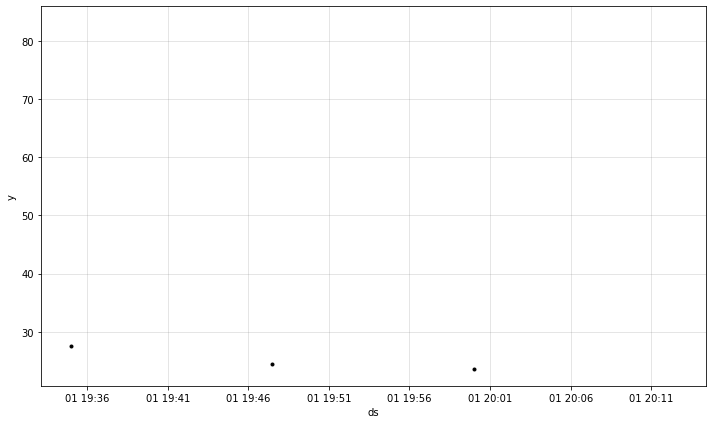

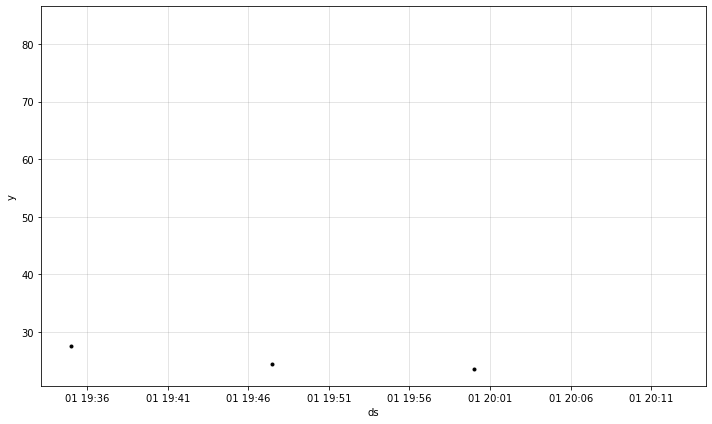

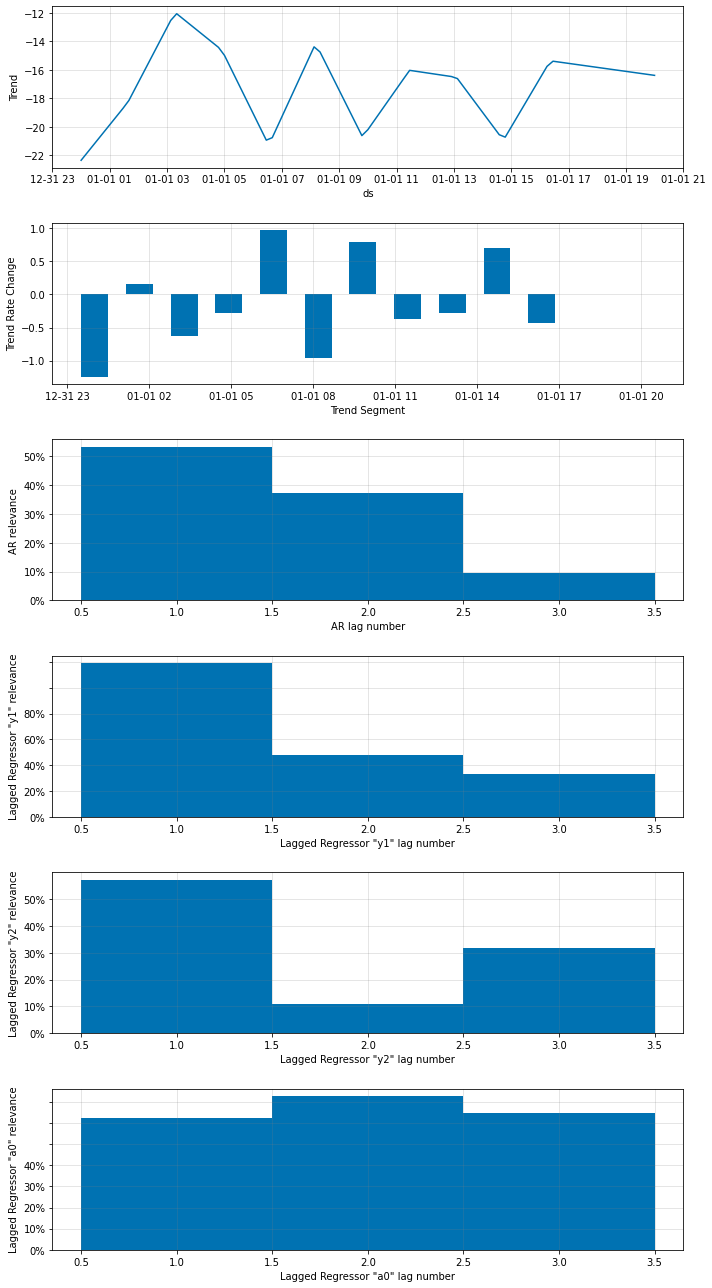

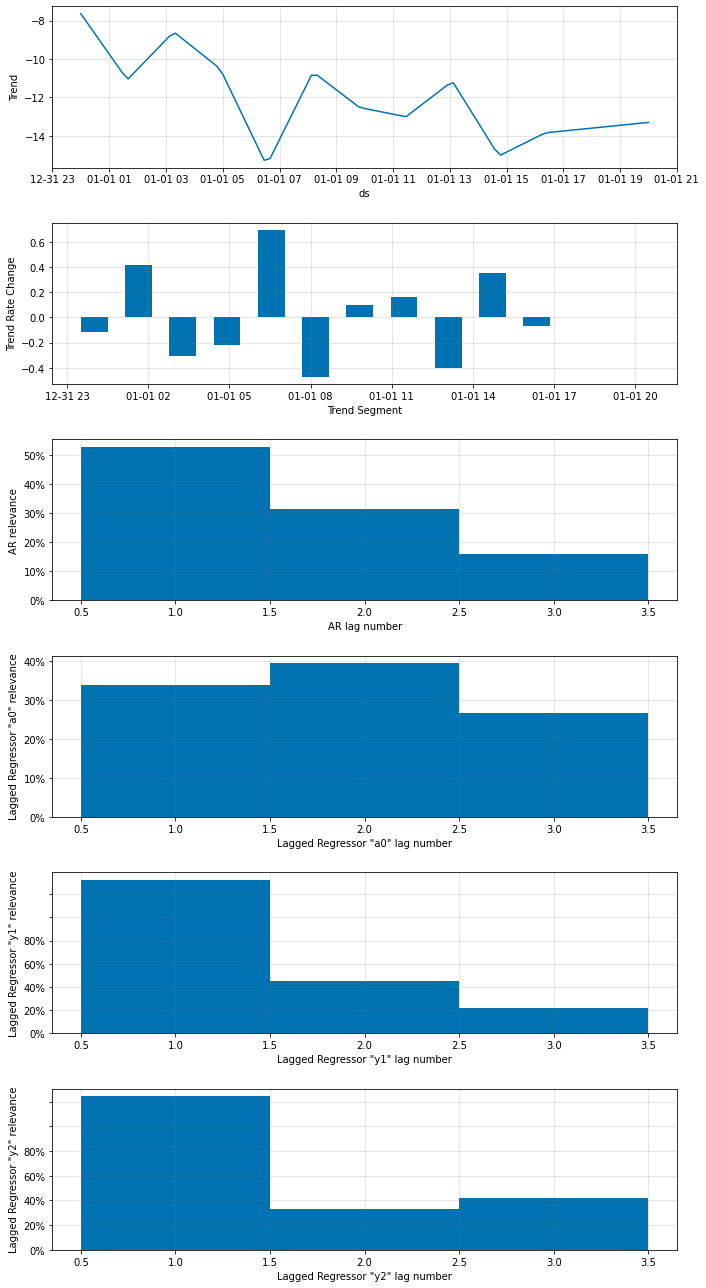

In [14]:


k = 3
n = 100
y, a = hospital_with_exog(k=k, n=n)
y = y[:-k]
t = [i * 15 * 50 for i in range(len(y) + k)]
x, x_std, forecast, m = nprophet_iskater_factory(y=y, k=k, t=t, a=a,)
assert len(x) == k
x1, x_std1, forecast1, m1 = \
    nprophet_fit_and_predict_with_exog_and_advance_vars(y=y, k=k, t=t, a=a)
# assert nearlysame(x1, x, 0.0001)

print('forecast', forecast)
print('forecast1', forecast1)
m.plot(forecast)
m1.plot(forecast1)
m.plot_parameters()
m1.plot_parameters()
import matplotlib.pyplot as plt
plt.show()